## ¿Qué es Limpieza de Datos?

Es proceso involucra detectar, eliminar,corregir o transformar cualquier anomalía, perturbación o irrelevancia de los datos.

## Razones para efectuar Limpieza de Datos
Este proceso ayuda a obtener resultados confiables, un error peligroso a la hora de realizar un análisis es abstraerse en exceso en el modelo a implementar, y no empezar por lo más simple. Tu fuente de información y su tratamiento. Los datos en el mundo real rara vez son homogéneos y directamente intuitivos. Asimismo, realizar este proceso puede reducir posibles sesgos en el análisis. He aquí varias de las razones más comunes:

* **Remover Outlies**: Por outlier nos referimos a cualquier dato que difiere significativamente del promedio o rango observado del resto de nuestros datos. Aunque los outliers son mucho más fáciles de apreciar gráficamente, también pueden detectarse a primera vista en un conjunto de datos, por ejemplo, encontrar la variable edad de una persona en 480. Inmediatamente nos indica que es un error de entrada de datr", probablemente la edad sea 4

* **Trabajar datos Nulos**:  No se ha introducido información alguna en alguno de los elementos de la variable. Estos pueden deberse a falta de información o bien a no haber podido estimar la variable,un error de entrada, o bien hubo un fenómeno externo que impidió la recolección de datos. Cualquiera sea la razón es importante estar consciente de esta situación, puesto que conociendo la localización y el tipo de datos que se encuentran nulos, podremos extrapolarlos, efectuar una transformación o bien, al menos conocer las limitaciones de nuestra información.

* **Eliminar o transformar datos erróneos e irrelevantes**: Estos representan información fuera de contexto en nuestra base de datos, por ejemplo tener la variable precio de venta en números negativos.

### 1. Cargamos la data

In [1]:
## Cargamos la libreria pandas y la data
import pandas as pd

df = pd.read_csv('data/mpg-data.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,power
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,NaN,usa,buick skylark 320,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,NaN,usa,plymouth satellite,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,NaN,usa,amc rebel sst,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,NaN,usa,ford torino,NaN
5,15.0,8,429.0,198.0,4341.0,10.0,NaN,usa,ford galaxie 500,NaN
6,14.0,8,454.0,220.0,4354.0,9.0,70.0,usa,chevrolet impala,NaN
7,14.0,8,440.0,215.0,4312.0,8.5,NaN,usa,plymouth fury iii,NaN
8,14.0,8,455.0,225.0,4425.0,10.0,70.0,usa,pontiac catalina,NaN
9,15.0,8,390.0,190.0,3850.0,8.5,NaN,usa,amc ambassador dpl,NaN


### 2. Checamos los nulos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    388 non-null    float64
 4   weight        396 non-null    float64
 5   acceleration  397 non-null    float64
 6   model_year    169 non-null    float64
 7   origin        397 non-null    object 
 8   name          394 non-null    object 
 9   power         1 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 31.2+ KB



* **Isnull** :nos permite detectar datos nulos, simplificando este proceso independientemente de la dimensión de nuestra base de datos.
* **Notnull**.:  Es la indicación lógica contraria, y la forma de llamar a la función es similar.

In [3]:
#agregamos la función isnull. 
df.isnull()
#Si lo prefieres puedes usar:
df.notnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,power
0,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,False,True,True,False
2,True,True,True,True,True,True,False,True,True,False
3,True,True,True,True,True,True,False,True,True,False
4,True,True,True,True,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
393,True,True,True,True,True,True,True,True,True,False
394,True,True,True,True,True,True,True,True,True,False
395,True,True,True,True,True,True,False,True,True,False
396,True,True,True,True,True,True,False,True,False,False


In [4]:
## Si deseamos contar el numero de nulos
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower       10
weight            2
acceleration      1
model_year      229
origin            1
name              4
power           397
dtype: int64

In [5]:
## Si deseamos ver los porcentajes
df.isnull().mean()

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.025126
weight          0.005025
acceleration    0.002513
model_year      0.575377
origin          0.002513
name            0.010050
power           0.997487
dtype: float64

### ¿ Que podemos hacer?
Debemos evaluar los siguientes puntos
1. Revisar si las variables que contienen nulos son relevantes, si no lo son, solo hay que quitarlas.
2. Revisar el grado de nulos, este dato es relativo, en la practica si el 10% de los datos contienen valores nulos podemos borrar dichos registros.
3. Validar si es posible realizar algún tipo de imputación de los datos, esto puede sesgar el analisis sin embargo es mejor que eliminarlo.

#### Formas diferentes de manejar datos nulos
1. Eliminar columnas segun datos nulos 
2. Eliminar filas con valores nulos 
3. Imputar datos nulos
4. Otros metodos de imputacion
5. Modelos avanzados de imputacion - Regresiones - CLusters

#### CASO 1 : Eliminar columnas segun datos nulos  (Eliminar Variables no relevantes)
Revisemos el caso anterior, la variable **power** tiene 99% de datos nulos, ¿Vale la pena rescatar esta variable, nos dara informacion relevante para nuestro analisis?
Este caso es extremo, sin embargo debemos tener clara las preguntas anteriores puesto que si ambas respuestas son no procedamos a eliminarla

In [6]:
## Eliminando la variable no relevante
del df["power"]

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,NaN,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,NaN,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,NaN,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,NaN,usa,ford torino


#### CASO 2 : Eliminar filas con valores nulos
* **Dropna** :
dropna() elimina las filas que contienen datos nulos, por tanto es muy útil para eliminar filas con varias datos nulos a la vez, ya que dichas filas no aportarían información significativa más que para unas cuantas variables

La **desventaja** al usar dropna()  es que puede eliminar información importante, como se muestra en el ejemplo, incluso las filas que solo tenían un solo dato nulo fueron eliminadas..

In [7]:
df_dropna = df.dropna()

In [8]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           163 non-null    float64
 1   cylinders     163 non-null    int64  
 2   displacement  163 non-null    float64
 3   horsepower    163 non-null    float64
 4   weight        163 non-null    float64
 5   acceleration  163 non-null    float64
 6   model_year    163 non-null    float64
 7   origin        163 non-null    object 
 8   name          163 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 12.7+ KB


Tambien podemos eliminar datos nulos en funcion de una sola columna, agregando subset a la funciona dropna()

In [9]:
df_dropna = df.dropna(subset='model_year')

In [10]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           169 non-null    float64
 1   cylinders     169 non-null    int64  
 2   displacement  169 non-null    float64
 3   horsepower    164 non-null    float64
 4   weight        168 non-null    float64
 5   acceleration  169 non-null    float64
 6   model_year    169 non-null    float64
 7   origin        169 non-null    object 
 8   name          169 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 13.2+ KB


In [11]:
### Revisemos la siguiente base de datos

df = pd.read_csv("data/housing.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Tipo de datos nulos
Hay tres tipos principales de datos faltantes:
Es importante comprender mejor cada uno de ellos para elegir los métodos adecuados para manejarlos.

1) MCAR - Falta completamente al azar
Esto sucede si todas las variables y observaciones tienen la misma probabilidad de falta Imagina proporcionarle a un niño Lego de diferentes colores para construir una casa. Cada Lego representa una pieza de información, como la forma y el color. El niño podría perder algunos Legos durante el juego. Estos legos perdidos representan información faltante, al igual que cuando no pueden recordar la forma o el color del Lego que tenían. Esa información se perdió al azar, pero no cambian la información que el niño tiene sobre los otros Legos.

2) MAR - Falta al azar
Para MAR, la probabilidad de que falte el valor está relacionada con el valor de la variable u otras variables en el conjunto de datos. Esto significa que no todas las observaciones y variables tienen la misma probabilidad de falLas mujeres son menos propensas a hablar sobre la edad y el peso que los hombres.
Los hombres son menos propensos a hablar sobre el salario y las emociones que las mujeres.

3) MNAR - Falta no al azar
MNAR se considera el escenario más difícil entre los tres tipos de datos faltantes. Se aplica cuando no se aplican ni MAR ni MCAR. En esta situación, la probabilidad de faltar es completamente diferente para diferentes valores de la misma variable, y estas razones pueden ser desconocidas para nosotros. Un ejemplo de MNAR es una encuesta sobre parejas casadas. Las parejas con una mala relación pueden no querer responder ciertas preguntas, ya que pueden sentirse avergonzados de hacerlo.

#### CASO 3 : Imputar datos
##### Estrategia - Remplazar por valores media - mediana - moda  (Numerica y Categorica)

In [12]:
import numpy as np
df = pd.DataFrame({
    'A' :[0, 3, np.nan, 10, 3, np.nan], 
    'B' : [np.nan, np.nan, 7.13, 13.82, 7, 7], 
    'C' : [np.nan, "Pandas", np.nan, "Pandas", "Python", "JavaScript"],
    'D' : ["Sound", np.nan, np.nan, "Music", "Songs", np.nan] 
})

print(df)

      A      B           C      D
0   0.0    NaN         NaN  Sound
1   3.0    NaN      Pandas    NaN
2   NaN   7.13         NaN    NaN
3  10.0  13.82      Pandas  Music
4   3.0   7.00      Python  Songs
5   NaN   7.00  JavaScript    NaN


In [13]:
### Aplicamos a una columna Numerica
print("ORIGINAL : \n", df['A'])
### Aplicamos a una columna Numerica
print("ORIGINAL : \n", df['A'])
#Media
print( "MEDIA : \n" ,df['A'].fillna( df['A'].mean().round(1) ) ) 
#Mediana
print("MEDIANA : \n" , df['A'].fillna( df['A'].median().round(1) ) ) 
#Moda
print("MODA : \n" , df['A'].fillna( df['A'].mode()[0].round(1) ) ) 

ORIGINAL : 
 0     0.0
1     3.0
2     NaN
3    10.0
4     3.0
5     NaN
Name: A, dtype: float64
ORIGINAL : 
 0     0.0
1     3.0
2     NaN
3    10.0
4     3.0
5     NaN
Name: A, dtype: float64
MEDIA : 
 0     0.0
1     3.0
2     4.0
3    10.0
4     3.0
5     4.0
Name: A, dtype: float64
MEDIANA : 
 0     0.0
1     3.0
2     3.0
3    10.0
4     3.0
5     3.0
Name: A, dtype: float64
MODA : 
 0     0.0
1     3.0
2     3.0
3    10.0
4     3.0
5     3.0
Name: A, dtype: float64


In [14]:
### Aplicamos a una columna Categorica

print("ORIGINAL : \n", df['C'])
#Media
#print( "MEDIA : \n" ,df['C'].fillna( df['C'].mean().round(1) ) ) 
#Mediana
#print("MEDIANA : \n" , df['C'].fillna( df['C'].median().round(1) ) ) 
#Moda - el dato mas frecuente
print("MODA : \n" , df['C'].fillna( df['C'].mode()[0] ) ) 

ORIGINAL : 
 0           NaN
1        Pandas
2           NaN
3        Pandas
4        Python
5    JavaScript
Name: C, dtype: object
MODA : 
 0        Pandas
1        Pandas
2        Pandas
3        Pandas
4        Python
5    JavaScript
Name: C, dtype: object


In [15]:
### Aplicamos a todas las numericas
#Media
print( df.fillna( df.mean(numeric_only=True).round(1) ) ) 

      A      B           C      D
0   0.0   8.70         NaN  Sound
1   3.0   8.70      Pandas    NaN
2   4.0   7.13         NaN    NaN
3  10.0  13.82      Pandas  Music
4   3.0   7.00      Python  Songs
5   4.0   7.00  JavaScript    NaN


In [16]:
#Mediana
print( df.fillna( df.median(numeric_only=True).round(1) ) ) 

      A      B           C      D
0   0.0   7.10         NaN  Sound
1   3.0   7.10      Pandas    NaN
2   3.0   7.13         NaN    NaN
3  10.0  13.82      Pandas  Music
4   3.0   7.00      Python  Songs
5   3.0   7.00  JavaScript    NaN


In [17]:
#moda
print( df.fillna( df.mode(numeric_only=True).iloc[0].round(1) ) ) 

      A      B           C      D
0   0.0   7.00         NaN  Sound
1   3.0   7.00      Pandas    NaN
2   3.0   7.13         NaN    NaN
3  10.0  13.82      Pandas  Music
4   3.0   7.00      Python  Songs
5   3.0   7.00  JavaScript    NaN


In [18]:
### Aplicamos a categoricas solamente

In [19]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns].fillna(df[string_columns].mode().iloc[0])

,C,D
0,Pandas,Sound
1,Pandas,Music
2,Pandas,Music
3,Pandas,Music
4,Python,Songs
5,JavaScript,Music


Tabmien se puedej realizar imputaciones para series de tiempo

In [20]:
#!pip install yfinance

In [21]:
#AHORA PROBAREMOS EN DATOS DE SERIES DE TIEMPO
import yfinance as yf
# Cargamos la data de la accion
# berkshire hathaway inc. (b stock)
brk = yf.Ticker('^GSPC')
df = brk.history(period="max", auto_adjust=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [22]:
### PROBLEMA , LAS FECHAS NO SON CONTINUAS; EXISTEN DIAS VACIOS POR LO QUE LO ARREGLAREMOS DE LA SIGUIENTE MANERA


df.reset_index(inplace=True)  ### Reseteamos el index

df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') ## Le damos formato de fecha en texto

df['Date'] = pd.to_datetime(df['Date'])  ## Pasamos de texto a formato fecha

#df.index = df['Date'] ##
df = df.set_index('Date')
#del df['Date'

idx = pd.date_range(min(df.index), max(df.index),freq= 'D')
print(df.reindex(idx))
df_fecha_completa = df.reindex(idx)

                   Open         High          Low        Close        Volume  \
1927-12-30    17.660000    17.660000    17.660000    17.660000  0.000000e+00   
1927-12-31          NaN          NaN          NaN          NaN           NaN   
1928-01-01          NaN          NaN          NaN          NaN           NaN   
1928-01-02          NaN          NaN          NaN          NaN           NaN   
1928-01-03    17.760000    17.760000    17.760000    17.760000  0.000000e+00   
...                 ...          ...          ...          ...           ...   
2023-09-24          NaN          NaN          NaN          NaN           NaN   
2023-09-25  4310.620117  4338.509766  4302.700195  4337.439941  3.195650e+09   
2023-09-26  4312.879883  4313.009766  4265.979980  4273.529785  3.472340e+09   
2023-09-27  4282.629883  4292.069824  4238.629883  4274.509766  3.875880e+09   
2023-09-28  4269.649902  4317.270020  4264.379883  4299.700195  3.846230e+09   

            Dividends  Stock Splits  
1

In [23]:
#### ¿Como podemos imputar series de tiempo?

In [24]:
## MOTODO HACIA ATRAS
df_fecha_completa.fillna(method='bfill')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1927-12-31,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
1928-01-01,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
1928-01-02,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-24,4310.620117,4338.509766,4302.700195,4337.439941,3.195650e+09,0.0,0.0
2023-09-25,4310.620117,4338.509766,4302.700195,4337.439941,3.195650e+09,0.0,0.0
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3.472340e+09,0.0,0.0
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3.875880e+09,0.0,0.0


In [25]:
##METODO HACIA ADELANTE
df_fecha_completa.fillna(method='ffill')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1927-12-31,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1928-01-01,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1928-01-02,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-24,4341.740234,4357.399902,4316.490234,4320.060059,3.349570e+09,0.0,0.0
2023-09-25,4310.620117,4338.509766,4302.700195,4337.439941,3.195650e+09,0.0,0.0
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3.472340e+09,0.0,0.0
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3.875880e+09,0.0,0.0


In [26]:
##METODO INTERPOLAR
#Documentacion
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
df_fecha_completa.interpolate(method ='linear')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1927-12-31,17.685000,17.685000,17.685000,17.685000,0.000000e+00,0.0,0.0
1928-01-01,17.710000,17.710000,17.710000,17.710000,0.000000e+00,0.0,0.0
1928-01-02,17.735000,17.735000,17.735000,17.735000,0.000000e+00,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-24,4320.993490,4344.806478,4307.296875,4331.646647,3.246957e+09,0.0,0.0
2023-09-25,4310.620117,4338.509766,4302.700195,4337.439941,3.195650e+09,0.0,0.0
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3.472340e+09,0.0,0.0
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3.875880e+09,0.0,0.0


In [27]:
df_fecha_completa.interpolate(method='polynomial', order=5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0.000000e+00,0.0,0.0
1927-12-31,13.967192,13.967192,13.967192,13.967192,0.000000e+00,0.0,0.0
1928-01-01,15.139495,15.139495,15.139495,15.139495,0.000000e+00,0.0,0.0
1928-01-02,16.928964,16.928964,16.928964,16.928964,0.000000e+00,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-24,4320.255140,4370.403766,4334.488138,4378.910688,2.853959e+09,0.0,0.0
2023-09-25,4310.620117,4338.509766,4302.700195,4337.439941,3.195650e+09,0.0,0.0
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3.472340e+09,0.0,0.0
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3.875880e+09,0.0,0.0


In [28]:
#### MIREMOS LAS DIFERENCIAS
df_fecha_completa['Close_bfill'] = df_fecha_completa['Close'].fillna(method='bfill')
df_fecha_completa['Close_ffill'] = df_fecha_completa['Close'].fillna(method='ffill')
df_fecha_completa['Close_interpolatelinear'] = df_fecha_completa['Close'].interpolate(method ='linear')
df_fecha_completa['Close_interpolatepoly'] = df_fecha_completa['Close'].interpolate(method='polynomial', order=5)


In [29]:
df_fecha_completa[['Close','Close_bfill','Close_ffill','Close_interpolatelinear','Close_interpolatepoly']].iloc[-20:,:]

,Close,Close_bfill,Close_ffill,Close_interpolatelinear,Close_interpolatepoly
2023-09-09,NaN,4487.459961,4457.490234,4467.480143,4477.922957
2023-09-10,NaN,4487.459961,4457.490234,4477.470052,4494.053101
2023-09-11,4487.459961,4487.459961,4487.459961,4487.459961,4487.459961
2023-09-12,4461.899902,4461.899902,4461.899902,4461.899902,4461.899902
2023-09-13,4467.439941,4467.439941,4467.439941,4467.439941,4467.439941
2023-09-14,4505.100098,4505.100098,4505.100098,4505.100098,4505.100098
2023-09-15,4450.319824,4450.319824,4450.319824,4450.319824,4450.319824
2023-09-16,NaN,4453.529785,4450.319824,4451.389811,4401.841246
2023-09-17,NaN,4453.529785,4450.319824,4452.459798,4423.754045
2023-09-18,4453.529785,4453.529785,4453.529785,4453.529785,4453.529785


<Axes: >

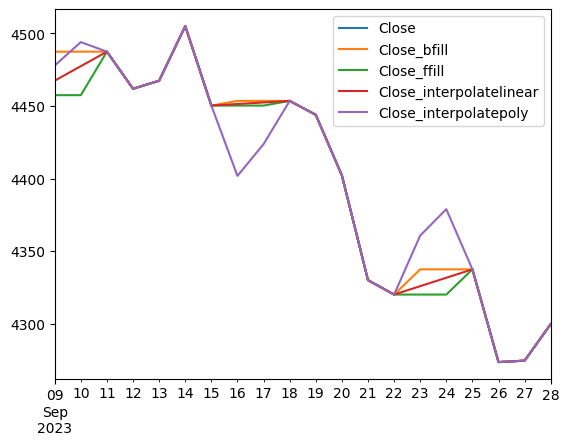

In [30]:
df_fecha_completa[['Close','Close_bfill','Close_ffill','Close_interpolatelinear','Close_interpolatepoly']].iloc[-20:,:].plot()

#### CASO 4 : Otros metodos de imputacion
##### Estrategia - Remplazar por valores media - mediana - moda  (Numerica y Categorica) Por Grupos

Algunas veces es necesario imputar utilizando informacion de otras variables con la cual se puede agrupar

In [31]:
df = pd.DataFrame({'ingresos': [1, np.nan, np.nan, 2, 3, 1, 3, np.nan, 3], 'regiones': ['A','A', 'B','B','B','B', 'C','C','C']})
print(df)

   ingresos regiones
0       1.0        A
1       NaN        A
2       NaN        B
3       2.0        B
4       3.0        B
5       1.0        B
6       3.0        C
7       NaN        C
8       3.0        C


In [32]:
## Media
df["ingresos_media"] = df.groupby("regiones")['ingresos'].transform(lambda x: x.fillna(x.mean()))


In [33]:
## Mediana
df["ingresoss_mediana"] = df.groupby("regiones")['ingresos'].transform(lambda x: x.fillna(x.median()))

In [34]:
## Moda
df["ingresos_moda"] = df.groupby("regiones")['ingresos'].transform(lambda x: x.fillna(x.mode()[0]))

In [35]:
df

,ingresos,regiones,ingresos_media,ingresoss_mediana,ingresos_moda
0,1.0,A,1.0,1.0,1.0
1,NaN,A,1.0,1.0,1.0
2,NaN,B,2.0,2.0,1.0
3,2.0,B,2.0,2.0,2.0
4,3.0,B,3.0,3.0,3.0
5,1.0,B,1.0,1.0,1.0
6,3.0,C,3.0,3.0,3.0
7,NaN,C,3.0,3.0,3.0
8,3.0,C,3.0,3.0,3.0


#### CASO 5 : Imputar datos metodo Avanzado
##### Estrategia - Remplazar utilizando un conjunto de variables con un modelo de regresion lineal


In [36]:
#Cargamos la base de datos
df = pd.read_csv('data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
## Eliminamos las variables que no necesitamos
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

In [38]:
### Realizaremos un Encoding, es decir vamos a tranformar la variable genero a numerica 
from sklearn.preprocessing import LabelEncoder
print(df['Sex'])
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


In [39]:
from sklearn.linear_model import LinearRegression
#Cargamos el modelo
lr = LinearRegression()

# Creamos la base por imputar, aquella  base que tenga la variable edad incompleta
testdf = df[df['Age'].isnull()==True]

# Creamos la base de entrenamiento con la base que tenga la variable edad completa
traindf = df[df['Age'].isnull()==False]

#Creamos la variable que queremos imputar como "y"
y = traindf['Age']

#Eliminamos la variable objetivo de la base de datos de entrenamiento
traindf.drop("Age",axis=1,inplace=True)

#Entrenamos la informacion para que aprenda el modelo a como imputar en funcion del resto de variables 
lr.fit(traindf,y)

#Eliminamos la variable objetivo de la base de datos que vamos a imputar
testdf.drop("Age",axis=1,inplace=True)

#Generamos la prediccion de los datos incompletos (nulos)
pred = lr.predict(testdf)

#Finalmente remplazamos los datos nulos por los datos predichos
testdf['Age']= pred

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\906838202.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Age",axis=1,inplace=True)
C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\906838202.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Age",axis=1,inplace=True)
C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\906838202.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [40]:
##Integramos toda la informacion
traindf['Age']=y


C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\1064385302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Age']=y


In [41]:
df_imputada = pd.concat([traindf,testdf])

In [42]:
df_imputada

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age
0,0,3,1,1,0,7.2500,22.000000
1,1,1,0,1,0,71.2833,38.000000
2,1,3,0,0,0,7.9250,26.000000
3,1,1,0,1,0,53.1000,35.000000
4,0,3,1,0,0,8.0500,35.000000
...,...,...,...,...,...,...,...
859,0,3,1,0,0,7.2292,29.089211
863,0,3,0,8,2,69.5500,-5.201268
868,0,3,1,0,0,9.5000,29.055198
878,0,3,1,0,0,7.8958,29.079226


In [43]:
testdf

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age
5,0,3,1,0,0,8.4583,29.070801
17,1,2,1,0,0,13.0000,30.108333
19,1,3,0,0,0,7.2250,22.446851
26,0,3,1,0,0,7.2250,29.089273
28,1,3,0,0,0,7.8792,22.437052
...,...,...,...,...,...,...,...
859,0,3,1,0,0,7.2292,29.089211
863,0,3,0,8,2,69.5500,-5.201268
868,0,3,1,0,0,9.5000,29.055198
878,0,3,1,0,0,7.8958,29.079226


#### METODOLOGIA MICE
Imputación Multivariante por Ecuaciones Encadenadas

Crea múltiples imputaciones para datos multivariados, donde cada variable puede ser imputada con un modelo estadístico particular.


1. Conserva las relaciones: MICE conserva las relaciones entre las variables en los datos originales, lo cual es importante para producir resultados precisos en modelos de aprendizaje automático.

2. Reduce el sesgo: Al imputar los valores faltantes varias veces y combinar los resultados, MICE reduce la cantidad de sesgo que se introduce en los datos.

3. Flexibilidad: MICE es una técnica flexible que puede manejar diferentes tipos de datos faltantes, incluidos los datos faltantes al azar y los datos no aleatorios faltantes.

4. Maneja grandes cantidades de datos faltantes: MICE es particularmente útil para conjuntos de datos con grandes cantidades de datos faltantes, donde otras técnicas de imputación pueden no ser apropiadas.

5. Comprensivo: MICE proporciona una forma integral de manejar los datos faltantes teniendo en cuenta la incertidumbre asociada con la imputación de valores faltantes.tes.

In [44]:
### IMPUTACION MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [46]:
# Creamos una copia de la base de datos
df_copy = df.copy()
#Creamos el metodo de imputacion con parametros 
imputer = IterativeImputer(max_iter=10, random_state=0)
#Aplicamos el modelo MICE en la data
imputed_values = imputer.fit_transform(df_copy)
# Creamos la nueva base con los datos imputados
df_imputed = pd.DataFrame(imputed_values, columns=df.columns)
df_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,0.0,23.274703,1.0,2.0,23.4500
889,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000


#### METODOLOGIA KNN
Establece el valor faltante sobre la media de todos los valores situados a k-distancias de la celda que contiene el faltante. Utiliza una distancia euclideana para determinar el valor faltante.

<img src="https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png" width=600px>


In [47]:
from sklearn.impute import KNNImputer
# Creamos una copia de la base de datos
df_copy = df.copy()
#Creamos el metodo de imputacion con parametros 
imputer = KNNImputer(n_neighbors=2)
#Aplicamos el modelo KNN en la data
imputed_values = imputer.fit_transform(df_copy)
# Creamos la nueva base con los datos imputados
df_imputed = pd.DataFrame(imputed_values, columns=df.columns)
df_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
888,0.0,3.0,0.0,20.0,1.0,2.0,23.4500
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


## METODOLOGIAS PARA DETECTAR OUTLIER

Un valor atípico es un elemento de datos/objeto que se desvía significativamente del resto de los objetos (llamados normales). Pueden ser causados por errores de medición o ejecución. El análisis para la detección de valores atípicos se conoce como minería de valores atípicos. Hay muchas maneras de detectar los valores atípicos, veremos algunas de ellas.

In [48]:

# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
diabetics = load_diabetes()
 
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Visualización de valores atípicos mediante el diagrama de caja
Captura el resumen de los datos de manera efectiva y eficiente con solo una simple caja y bigotes. Boxplot resume los datos de muestra utilizando los percentiles 25, 50 y 75. Uno puede obtener información (cuartiles, medianas y valores atípicos) en el conjunto de datos con solo mirar su diagrama de caja.

<img src="https://datatab.es/assets/tutorial/Interpretaci%C3%B3n_de_gr%C3%A1ficos_de_caja.png" width=800px>



<Axes: >

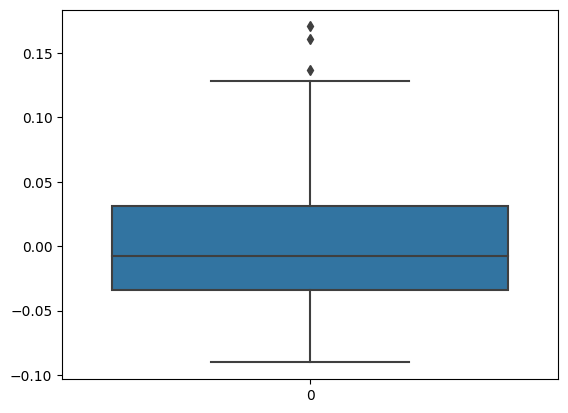

In [49]:

# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

In [50]:
#### DETECTANDO OUTLIER CON EL RANGO INTERCUARTILICO
# PASO 1: Calculamos el Q1 y Q3
percentile25 = df_diabetics['bmi'].quantile(0.25)
percentile75 = df_diabetics['bmi'].quantile(0.75)
# PASO 2 : Calculamos el Rango Intercuartilico
iqr = percentile75 - percentile25
# PASO 3 : Calculamos el rango maximo y rango minimo
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
# PASO 4: Identificamos los outlier
df_diabetics[df_diabetics['bmi'] > upper_limit]

Upper limit 0.1294636406639386
Lower limit -0.13244469328909578


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071019,0.048628
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059


### METODOLOGIA Z score

Z- La puntuación también se denomina puntuación estándar. Este valor/puntuación ayuda a entender qué tan lejos está el punto de datos de la media. Y después de configurar un valor de umbral, se pueden utilizar los valores de puntuación z de los puntos de datos para definir los valores atípicos.

**Zscore = (data_point -media) / desviación estándar**



In [51]:

# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df_diabetics['bmi']))
print(z)

0      1.297088
1      1.082180
2      0.934533
3      0.243771
4      0.764944
         ...   
437    0.413360
438    0.334410
439    0.334410
440    0.821235
441    1.535374
Name: bmi, Length: 442, dtype: float64


In [52]:
print("Highest allowed",df_diabetics['bmi'].mean() + 3*df_diabetics['bmi'].std())
print("Lowest allowed",df_diabetics['bmi'].mean() - 3*df_diabetics['bmi'].std())

Highest allowed 0.14285714285714263
Lowest allowed -0.14285714285714307


In [53]:
df_diabetics[z > 3]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059


### ¿Que hacemos con los outlier?

Hay 2 soluciones
- Eliminarlos : Se filtran los outlier
- Capearlos : Vamos a truncar los outlier a los valores extremos

#### Eliminando Outliers

In [54]:
# PASO 1: Calculamos el Q1 y Q3
percentile25 = df_diabetics['bmi'].quantile(0.25)
percentile75 = df_diabetics['bmi'].quantile(0.75)
# PASO 2 : Calculamos el Rango Intercuartilico
iqr = percentile75 - percentile25
# PASO 3 : Calculamos el rango maximo y rango minimo
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
# PASO 4: Nos quedamos con los datos dentro de los umbrales max y min
df_diabetics[(df_diabetics['bmi'] >= lower_limit) & (df_diabetics['bmi'] <= upper_limit)]

Upper limit 0.1294636406639386
Lower limit -0.13244469328909578


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [55]:
from scipy import stats
import numpy as np
## Calculamos el z Score
z = np.abs(stats.zscore(df_diabetics['bmi']))
#Filtramos
df_diabetics[(z >= -3) & (z <= 3)]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


#### Capeando Outliers

In [56]:

# PASO 1: Calculamos el Q1 y Q3
percentile25 = df_diabetics['bmi'].quantile(0.25)
percentile75 = df_diabetics['bmi'].quantile(0.75)
# PASO 2 : Calculamos el Rango Intercuartilico
iqr = percentile75 - percentile25
# PASO 3 : Calculamos el rango maximo y rango minimo
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
# PASO 4: Remplazamos los valores por los valores extremos
#Copiamos la tabla
new_df_cap = df_diabetics.copy()
#Capeamos los valores outlier
new_df_cap['bmi'] = np.where(
    new_df_cap['bmi'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['bmi'] < lower_limit,
        lower_limit,
        new_df_cap['bmi']
    )
)
new_df_cap 

Upper limit 0.1294636406639386
Lower limit -0.13244469328909578


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [57]:
## Calculamos el z Score
#Calculamos el Z score
z = np.abs(stats.zscore(df_diabetics['bmi']))
#Calculamos los valores maximos y minimos segun el z score (3 desviaciones estandar)
upper_limit = df_diabetics['bmi'].mean() + 3*df_diabetics['bmi'].std()
lower_limit = df_diabetics['bmi'].mean() - 3*df_diabetics['bmi'].std()
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
#Copiamos la tabla
new_df_cap = df_diabetics.copy()
#Capeamos los valores outlier
new_df_cap['bmi'] = np.where(
    new_df_cap['bmi'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['bmi'] < lower_limit,
        lower_limit,
        new_df_cap['bmi']
    )
)
new_df_cap 

Upper limit 0.14285714285714263
Lower limit -0.14285714285714307


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### # Existen mas metodos para deteccion de outlier mas avanzados
## Revisar los siguientes lecturas para aprender sobre estas metodologias

* DBSCAN > https://www.section.io/engineering-education/dbscan-clustering-in-python/
* ISOLATION FOREST > https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

### REPASANDO LO APRENDIDO CON DATOS DE PERU

In [58]:
#### INFORMACION DEL BCRP API
import requests
import json
import pandas as pd

codigo_serie = "PD04692MD"
fecha_inicio ="2013-01-01"
fecha_fin = "2023-09-20"
###API BCRP
response_API = requests.get(f'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigo_serie}/json/{fecha_inicio}/{fecha_fin}')
jsonResponse =response_API.json()
df = pd.DataFrame(jsonResponse['periods'])
df["values"] = df['values'].apply(lambda x: x[0])
df["values"] = df["values"].astype(float)
df.columns = ["Fecha",jsonResponse['config']["series"][0]['name']]
df

,Fecha,"Tasas de interés - Interbancaria, S/"
0,02.Ene.13,4.24
1,03.Ene.13,4.15
2,04.Ene.13,4.20
3,07.Ene.13,4.18
4,08.Ene.13,4.21
...,...,...
2686,14.Set.23,7.75
2687,15.Set.23,7.50
2688,18.Set.23,7.50
2689,19.Set.23,7.50


In [59]:
### El formato de fechas no es comun, vamos a volverlo entendible para python
df["Fecha"] = df["Fecha"].str.replace("Ene","01")
df["Fecha"] = df["Fecha"].str.replace("Feb","02")
df["Fecha"] = df["Fecha"].str.replace("Mar","03")
df["Fecha"] = df["Fecha"].str.replace("Abr","04")
df["Fecha"] = df["Fecha"].str.replace("May","05")
df["Fecha"] = df["Fecha"].str.replace("Jun","06")
df["Fecha"] = df["Fecha"].str.replace("Jul","07")
df["Fecha"] = df["Fecha"].str.replace("Ago","08")
df["Fecha"] = df["Fecha"].str.replace("Set","09")
df["Fecha"] = df["Fecha"].str.replace("Oct","10")
df["Fecha"] = df["Fecha"].str.replace("Nov","11")
df["Fecha"] = df["Fecha"].str.replace("Dic","12")

In [60]:
df

,Fecha,"Tasas de interés - Interbancaria, S/"
0,02.01.13,4.24
1,03.01.13,4.15
2,04.01.13,4.20
3,07.01.13,4.18
4,08.01.13,4.21
...,...,...
2686,14.09.23,7.75
2687,15.09.23,7.50
2688,18.09.23,7.50
2689,19.09.23,7.50


In [61]:
df["Fecha"] = pd.to_datetime(df["Fecha"],format="%d.%m.%y")

In [62]:
df

,Fecha,"Tasas de interés - Interbancaria, S/"
0,2013-01-02,4.24
1,2013-01-03,4.15
2,2013-01-04,4.20
3,2013-01-07,4.18
4,2013-01-08,4.21
...,...,...
2686,2023-09-14,7.75
2687,2023-09-15,7.50
2688,2023-09-18,7.50
2689,2023-09-19,7.50


In [63]:
### FORMAR FINAL
from datetime import date
today = date.today()
codigo_serie = "PD04692MD"
fecha_inicio ="2013-01-01"
fecha_fin = today
###API BCRP
response_API = requests.get(f'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigo_serie}/json/{fecha_inicio}/{fecha_fin}')
jsonResponse =response_API.json()
df = pd.DataFrame(jsonResponse['periods'])
df["values"] = df['values'].apply(lambda x: x[0])
df["values"] = df["values"].astype(float)

df.columns = ["Fecha",jsonResponse['config']["series"][0]['name']]
df["Fecha"] = df["Fecha"].str.replace("Ene","01")
df["Fecha"] = df["Fecha"].str.replace("Feb","02")
df["Fecha"] = df["Fecha"].str.replace("Mar","03")
df["Fecha"] = df["Fecha"].str.replace("Abr","04")
df["Fecha"] = df["Fecha"].str.replace("May","05")
df["Fecha"] = df["Fecha"].str.replace("Jun","06")
df["Fecha"] = df["Fecha"].str.replace("Jul","07")
df["Fecha"] = df["Fecha"].str.replace("Ago","08")
df["Fecha"] = df["Fecha"].str.replace("Set","09")
df["Fecha"] = df["Fecha"].str.replace("Oct","10")
df["Fecha"] = df["Fecha"].str.replace("Nov","11")
df["Fecha"] = df["Fecha"].str.replace("Dic","12")
df["Fecha"] = pd.to_datetime(df["Fecha"],format="%d.%m.%y")

In [64]:
### COMO FUNCION
def get_bcrp_diario(codigo_serie="PD04692MD",fecha_inicio="2013-01-01"):
    today = date.today()
    #codigo_serie = "PD04692MD"
    #fecha_inicio ="2013-01-01"
    fecha_fin = today
    ###API BCRP
    response_API = requests.get(f'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/{codigo_serie}/json/{fecha_inicio}/{fecha_fin}')
    jsonResponse =response_API.json()
    df = pd.DataFrame(jsonResponse['periods'])
    df["values"] = df['values'].apply(lambda x: x[0])
    df["values"] = df["values"].astype(float)
    df.columns = ["Fecha",jsonResponse['config']["series"][0]['name']]
    df["Fecha"] = df["Fecha"].str.replace("Ene","01")
    df["Fecha"] = df["Fecha"].str.replace("Feb","02")
    df["Fecha"] = df["Fecha"].str.replace("Mar","03")
    df["Fecha"] = df["Fecha"].str.replace("Abr","04")
    df["Fecha"] = df["Fecha"].str.replace("May","05")
    df["Fecha"] = df["Fecha"].str.replace("Jun","06")
    df["Fecha"] = df["Fecha"].str.replace("Jul","07")
    df["Fecha"] = df["Fecha"].str.replace("Ago","08")
    df["Fecha"] = df["Fecha"].str.replace("Set","09")
    df["Fecha"] = df["Fecha"].str.replace("Oct","10")
    df["Fecha"] = df["Fecha"].str.replace("Nov","11")
    df["Fecha"] = df["Fecha"].str.replace("Dic","12")
    df["Fecha"] = pd.to_datetime(df["Fecha"],format="%d.%m.%y")
    return df

In [65]:
df = get_bcrp_diario(codigo_serie="PD04692MD",fecha_inicio="2013-01-01")

In [66]:
df

,Fecha,"Tasas de interés - Interbancaria, S/"
0,2013-01-02,4.24
1,2013-01-03,4.15
2,2013-01-04,4.20
3,2013-01-07,4.18
4,2013-01-08,4.21
...,...,...
2691,2023-09-21,7.50
2692,2023-09-22,7.50
2693,2023-09-25,7.50
2694,2023-09-26,7.50


In [67]:
#### BUSQUEMOS COMPLETAR TODAS LAS FECHAS DE LA TASA DE INTERES INTERBANCARIA

df = df.set_index('Fecha')
#del df['Date'

idx = pd.date_range(min(df.index), max(df.index),freq= 'D')
print(df.reindex(idx))
df_fecha_completa = df.reindex(idx)

            Tasas de interés - Interbancaria, S/
2013-01-02                                  4.24
2013-01-03                                  4.15
2013-01-04                                  4.20
2013-01-05                                   NaN
2013-01-06                                   NaN
...                                          ...
2023-09-23                                   NaN
2023-09-24                                   NaN
2023-09-25                                  7.50
2023-09-26                                  7.50
2023-09-27                                  7.50

[3921 rows x 1 columns]


In [68]:
df_fecha_completa.columns

Index(['Tasas de interés - Interbancaria, S/'], dtype='object')

In [69]:
### APLIQUEMOS ALGUN TIPO DE IMPUTACION
df_fecha_completa['Close_bfill'] = df_fecha_completa['Tasas de interés - Interbancaria, S/'].fillna(method='bfill')
df_fecha_completa['Close_ffill'] = df_fecha_completa['Tasas de interés - Interbancaria, S/'].fillna(method='ffill')
df_fecha_completa['Close_interpolatelinear'] = df_fecha_completa['Tasas de interés - Interbancaria, S/'].interpolate(method ='linear')
df_fecha_completa['Close_interpolatepoly'] = df_fecha_completa['Tasas de interés - Interbancaria, S/'].interpolate(method='polynomial', order=5)

In [70]:
df_fecha_completa

,"Tasas de interés - Interbancaria, S/",Close_bfill,Close_ffill,Close_interpolatelinear,Close_interpolatepoly
2013-01-02,4.24,4.24,4.24,4.240000,4.240000
2013-01-03,4.15,4.15,4.15,4.150000,4.150000
2013-01-04,4.20,4.20,4.20,4.200000,4.200000
2013-01-05,NaN,4.18,4.20,4.193333,4.209108
2013-01-06,NaN,4.18,4.20,4.186667,4.181156
...,...,...,...,...,...
2023-09-23,NaN,7.50,7.50,7.500000,7.502152
2023-09-24,NaN,7.50,7.50,7.500000,7.501655
2023-09-25,7.50,7.50,7.50,7.500000,7.500000
2023-09-26,7.50,7.50,7.50,7.500000,7.500000


## VEAMOS UN EJEMPLO CON LA BASE DEL ENAHO

In [71]:
import wget 
import zipfile
print("Descarga de datos Modulo 2")

wget.download('https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/784-Modulo02.zip')

print("Descomprimir datos ")
path_to_zip_file = '784-Modulo02.zip'
directory_to_extract_to = '784-Modulo02'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

print("Lectura de datos")

df_mod2 = pd.read_stata('784-Modulo02/784-Modulo02/enaho01-2022-200.dta')


print("Descarga de datos Modulo 5 ")

wget.download('https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/784-Modulo05.zip')

print("Descomprimir datos")

path_to_zip_file = '784-Modulo05.zip'
directory_to_extract_to = '784-Modulo05'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

print("Lectura de datos")

df_mod5 = pd.read_stata('784-Modulo05/784-Modulo05/enaho01a-2022-500.dta')

wget.download('https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/784-Modulo03.zip')

print("Descomprimir datos")

path_to_zip_file = '784-Modulo03.zip'
directory_to_extract_to = '784-Modulo03'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

print("Lectura de datos")

df_mod3 = pd.read_stata('784-Modulo03/784-Modulo03/enaho01a-2022-300.dta')

Descarga de datos Modulo 2
100% [........................................................................] 15620941 / 15620941Descomprimir datos 
Lectura de datos
Descarga de datos Modulo 5 
100% [........................................................................] 27530092 / 27530092Descomprimir datos
Lectura de datos
100% [........................................................................] 21974426 / 21974426Descomprimir datos
Lectura de datos


In [72]:
df_select_2 = df_mod2[['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo',
       'dominio', 'estrato', 'p207', 'p208a', 
       'facpob07']]

df_select_3 = df_mod3[['conglome', 'vivienda', 'hogar', 'codperso','p301a']]
df_select_5 = df_mod5[['conglome', 'vivienda', 'hogar', 'codperso',
       'i530a',  'i541a',
       'ocu500', 'ocupinf', 'emplpsec', 'fac500a']]




In [73]:
df_merge = pd.merge(df_select_2 ,df_select_3,on=['conglome','vivienda','hogar','codperso'],how='left')
df_merge = pd.merge(df_merge ,df_select_5,on=['conglome','vivienda','hogar','codperso'],how='left')
df_merge.head()

,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p207,p208a,facpob07,p301a,i530a,i541a,ocu500,ocupinf,emplpsec,fac500a
0,005030,008,11,01,010201,selva,de 20 000 a 49 999 habitantes,hombre,85.0,106.890244,primaria completa,NaN,NaN,no pea,NaN,NaN,64.477516
1,005030,008,11,02,010201,selva,de 20 000 a 49 999 habitantes,mujer,75.0,106.890244,secundaria completa,NaN,NaN,no pea,NaN,NaN,81.375023
2,005030,008,11,03,010201,selva,de 20 000 a 49 999 habitantes,mujer,53.0,106.890244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,005030,017,11,01,010201,selva,de 20 000 a 49 999 habitantes,mujer,77.0,106.890244,sin nivel,5638.0,NaN,ocupado,empleo informal,empleo informal en el sector informal,81.375023
4,005030,017,11,02,010201,selva,de 20 000 a 49 999 habitantes,hombre,55.0,106.890244,superior no universitaria completa,NaN,NaN,ocupado,empleo informal,empleo informal en el sector informal,114.111549


In [77]:
### CAPTUREMOS EL DEPARTAMENTO A PARTIR DEL UBIGEO

df_merge["DEP"] = df_merge["ubigeo"].str[0:2]

### CREEMOS UNA FLAG PARA DETERMINAR SI TENEMOS UN DATO FALTANTE EN EL INGRESO
df_merge["INGNULL"] = np.where(df_merge["i530a"].isna(),1,0)

In [78]:
### Podemos asumir que aquellos que tienen mayor a 18 años seran considerados como gente que trabaja (La edad minima es 14)
df_merge18 = df_merge[df_merge["p208a"]>17]

In [79]:
#Validemos los nulos
df_merge18.isna().mean()

conglome    0.000000
vivienda    0.000000
hogar       0.000000
codperso    0.000000
ubigeo      0.000000
dominio     0.000000
estrato     0.000000
p207        0.000000
p208a       0.000000
facpob07    0.000000
p301a       0.029871
i530a       0.662714
i541a       0.919658
ocu500      0.029240
ocupinf     0.277519
emplpsec    0.436482
fac500a     0.029240
DEP         0.000000
INGNULL     0.000000
dtype: float64

In [81]:
# Si analisamos los nulos dentro de los que trabajan y los que no quizas tengamos una mejor poblacion por imputar
df_merge18["ocu500"].value_counts()

ocu500
ocupado               58362
no pea                17539
desocupado abierto     1528
desocupado oculto       881
0                       108
Name: count, dtype: int64

In [83]:
## La mitad de los datos tienen nulos para los que trabajan , para el resto podemos imputarle con cero dado que no trabajan
df_merge18.groupby(["ocu500"])["INGNULL"].mean()

ocu500
0                     1.000000
ocupado               0.533155
desocupado abierto    1.000000
desocupado oculto     1.000000
no pea                1.000000
Name: INGNULL, dtype: float64

In [91]:
## Imputamos con cero
df_merge18["Ingresos"] = np.where(df_merge18["ocu500"].isin(["desocupado abierto","desocupado oculto","no pea"]),0,df_merge18["i530a"])

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\947050881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge18["Ingresos"] = np.where(df_merge18["ocu500"].isin(["desocupado abierto","desocupado oculto","no pea"]),0,df_merge18["i530a"])


In [92]:
## ¿ Deberiamos borranos el 41 %  de los datos?
df_merge18["Ingresos"].isna().mean()

0.4157712305025997

In [93]:
### Vayamos por una imputacion sofisticada para reducir el sesgo que podriamos generar si aplicamo una media simple

############# CAMBIEMOS LOS DATOS A NUMERICOS ###########
df_merge18["p301a"].cat.codes.unique()


array([ 3,  5, -1,  0,  7,  6,  9,  2,  4,  8, 10, 11,  1], dtype=int8)

In [94]:
df_merge18["p301a"].unique()

['primaria completa', 'secundaria completa', NaN, 'sin nivel', 'superior no universitaria completa', ..., 'secundaria incompleta', 'superior universitaria incompleta', 'maestria / doctorado', 'basica especial', 'educacion inicial']
Length: 13
Categories (12, object): ['sin nivel' < 'educacion inicial' < 'primaria incompleta' < 'primaria completa' ... 'superior universitaria incompleta' < 'superior universitaria completa' < 'maestria / doctorado' < 'basica especial']

In [95]:
########### TRANSFORMAMOS LOS DATOS ######################

## Aqui cambiamos los datos a numericos
df_merge18["Educacion"] =  df_merge18["p301a"].cat.codes
## Aquie remplazamos el valor 11 que hace referencia a Educacion basica especial por el valor cero
df_merge18["Educacion"] = np.where(df_merge18["Educacion"]==11,0,df_merge18["Educacion"])

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\2654043258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge18["Educacion"] =  df_merge18["p301a"].cat.codes
C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\2654043258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge18["Educacion"] = np.where(df_merge18["Educacion"]==11,0,df_merge18["Educacion"])


In [96]:
### Tranformamos en dummy los valores del genero a 0 y 1
le = LabelEncoder()
df_merge18['Genero'] = le.fit_transform(df_merge18['p207'])
print(df_merge18['Genero'])

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\2196971007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge18['Genero'] = le.fit_transform(df_merge18['p207'])


0         0
1         1
2         1
3         1
4         0
         ..
121246    1
121247    1
121248    0
121251    0
121252    1
Name: Genero, Length: 80780, dtype: int32


In [97]:
## Creamos la variable edad
df_merge18["Edad"] = df_merge18["p208a"]

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\3737918664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge18["Edad"] = df_merge18["p208a"]


In [99]:
## Agregemos una variable espacial
df_merge18["Lima"] = np.where(df_merge18["DEP"]=='15',1,0)

C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_29576\1470663875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge18["Lima"] = np.where(df_merge18["DEP"]=='15',1,0)


In [104]:
##3 Revisamos nuestra base
df_merge18[['Edad','Genero',"Educacion","Lima","Ingresos"]].isna().sum()

Edad             0
Genero           0
Educacion        0
Lima             0
Ingresos     33586
dtype: int64

In [109]:
base_imputada18 = df_merge18[['Edad','Genero',"Educacion","Lima","Ingresos"]]

In [112]:
base_imputada18.describe()

,Edad,Genero,Educacion,Lima,Ingresos
count,80780.000000,80780.000000,80780.000000,80780.000000,4.719400e+04
mean,45.240740,0.525155,4.600446,0.141434,5.806708e+03
std,18.134281,0.499370,2.617066,0.348470,1.574747e+04
min,18.000000,0.000000,-1.000000,0.000000,0.000000e+00
25%,30.000000,0.000000,3.000000,0.000000,0.000000e+00
50%,44.000000,1.000000,5.000000,0.000000,8.330000e+02
75%,58.000000,1.000000,6.000000,0.000000,6.498000e+03
max,98.000000,1.000000,10.000000,1.000000,1.243416e+06


In [110]:
imputer = IterativeImputer(max_iter=4, random_state=0)
#Aplicamos el modelo MICE en la data
imputed_values = imputer.fit_transform(base_imputada18)
# Creamos la nueva base con los datos imputados
df_imputed = pd.DataFrame(imputed_values, columns=base_imputada18.columns)
df_imputed

,Edad,Genero,Educacion,Lima,Ingresos
0,85.0,0.0,3.0,0.0,0.000000
1,75.0,1.0,5.0,0.0,0.000000
2,53.0,1.0,-1.0,0.0,-749.181100
3,77.0,1.0,0.0,0.0,5638.000000
4,55.0,0.0,7.0,0.0,10744.536738
...,...,...,...,...,...
80775,49.0,1.0,2.0,0.0,3566.884521
80776,46.0,1.0,5.0,0.0,0.000000
80777,46.0,0.0,5.0,0.0,5501.454590
80778,72.0,0.0,3.0,0.0,3715.904785


<Axes: >

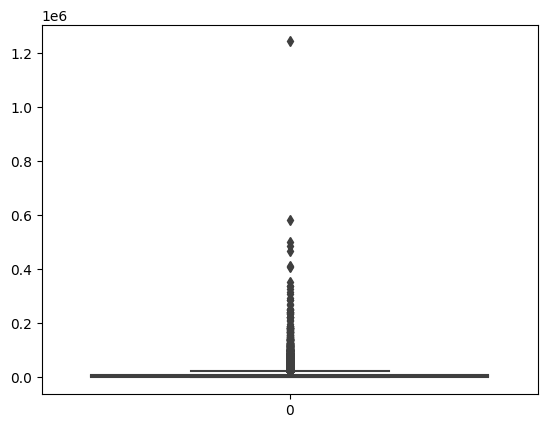

In [123]:
### Revisemos los datos imputados
tmp = df_imputed["Ingresos"]
sns.boxplot(tmp)

### Muchos Outlier

<Axes: >

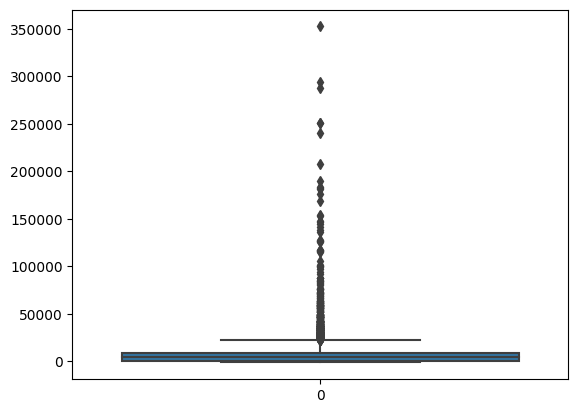

In [124]:
## ¿Si lo vemos en Lima?
tmp = df_imputed[df_imputed["Lima"]==1]["Ingresos"].reset_index(drop=True)
sns.boxplot(tmp)
##¿Mejoro? algunos outlier de pueden deber a que existen zonas donde el ingreso es muy alto y esta justificado. Por tanto no todos son outliers

In [126]:
### Por lo pronto veamos el problema mas importante .... ¿ Ingresos Negativos?

df_imputed["Ingresos_imputed_capped"] = np.where(df_imputed["Ingresos"]<0,0,df_imputed["Ingresos"])

In [127]:
df_imputed.head()

,Edad,Genero,Educacion,Lima,Ingresos,Ingresos_imputed_capped
0,85.0,0.0,3.0,0.0,0.000000,0.000000
1,75.0,1.0,5.0,0.0,0.000000,0.000000
2,53.0,1.0,-1.0,0.0,-749.181100,0.000000
3,77.0,1.0,0.0,0.0,5638.000000,5638.000000
4,55.0,0.0,7.0,0.0,10744.536738,10744.536738


In [128]:
## Listo ya tenemos nuestra base limpia utilizando el modelo MICE
df_imputed.isna().mean()

Edad                       0.0
Genero                     0.0
Educacion                  0.0
Lima                       0.0
Ingresos                   0.0
Ingresos_imputed_capped    0.0
dtype: float64